In [15]:
from IPython.display import display
import ipywidgets as widgets
button = widgets.Button(description="Click Me!")
output = widgets.Output()

display(button, output)

def on_button_clicked(b):
    with output:
        print("Button clicked.")

button.on_click(on_button_clicked)

Button(description='Click Me!', style=ButtonStyle())

Output()

In [7]:
import networkx as nx
G = nx.DiGraph()
G.add_edge(1, 2, labels="20", capacity=20)
G.add_edge(1, 3, labels="22", capacity=22)
G.add_edge(2, 3, labels="13", capacity=13)
G.add_edge(2, 4, labels="8", capacity=8)
G.add_edge(2, 5, labels="11", capacity=11)
G.add_edge(3, 4, labels="15", capacity=15)
G.add_edge(3, 6, labels="16", capacity=16)
G.add_edge(4, 5, labels="12", capacity=12)
G.add_edge(4, 6, labels="8", capacity=8)
G.add_edge(4, 7, labels="17", capacity=17)
G.add_edge(5, 7, labels="15", capacity=15)
G.add_edge(6, 7, labels="22", capacity=22)

In [8]:
import matplotlib.pyplot as plt
from networkx.classes.function import info

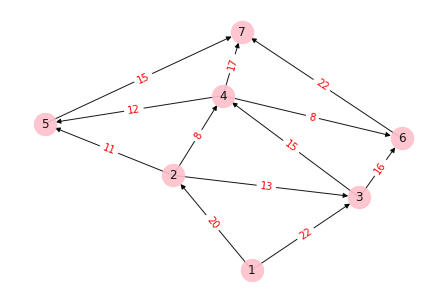

In [13]:
pos = nx.spring_layout(G)
plt.figure()
labels = nx.get_edge_attributes(G,'labels')
nx.draw(G,pos,edge_color='black',width=1,linewidths=1,node_size=500,node_color='pink',alpha=0.9,labels={node:node for node in G.nodes()})
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,font_color='red')
plt.savefig("file.png", format="PNG")
plt.show()

42
{1: {2: 20, 3: 22}, 2: {3: 1, 4: 8, 5: 11}, 3: {4: 15, 6: 8}, 4: {5: 4, 6: 2, 7: 17}, 5: {7: 15}, 6: {7: 10}, 7: {}}


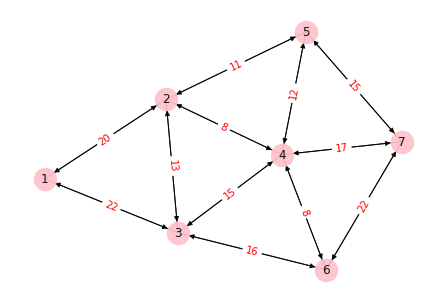

{'capacity': 20, 'flow': 20}
{'capacity': 22, 'flow': 22}
{'capacity': 13, 'flow': 1}
{'capacity': 8, 'flow': 8}
{'capacity': 11, 'flow': 11}
{'capacity': 15, 'flow': 9}
{'capacity': 16, 'flow': 14}
{'capacity': 12, 'flow': 0}
{'capacity': 8, 'flow': 0}
{'capacity': 17, 'flow': 17}
{'capacity': 0, 'flow': 0}
{'capacity': 15, 'flow': 11}
{'capacity': 0, 'flow': 0}
{'capacity': 22, 'flow': 14}


In [12]:
from networkx.algorithms.flow import edmonds_karp
flow_value, flow_dict = nx.maximum_flow(G, 1, 7)
print (flow_value)
print (flow_dict)
cut_value, partition = nx.minimum_cut(G, 1, 7)
reachable, non_reachable = partition
#cutset = set()
#for u, nbrs in ((n, G[n]) for n in reachable):
#    cutset.update((u, v) for v in nbrs if v in non_reachable)
#print(sorted(cutset))
#cut_value == sum(G.edges[u, v]['capacity'] for (u, v) in cutset)
#print(cut_value)
R = edmonds_karp(G,1,7)
pos = nx.spring_layout(R)
plt.figure()
nx.draw(R,pos,edge_color='black',width=1,linewidths=1,\
node_size=500,node_color='pink',alpha=0.9,\
labels={node:node for node in R.nodes()})
nx.draw_networkx_edge_labels(R,pos,edge_labels=labels,font_color='red')
plt.show()
for u in R:
    for e in R[u].values():
        if(e['flow']>=0):
            print(e)

{'capacity': 20, 'flow': 20}
{'capacity': 22, 'flow': 22}
{'capacity': 13, 'flow': 1}
{'capacity': 8, 'flow': 8}
{'capacity': 11, 'flow': 11}
{'capacity': 15, 'flow': 9}
{'capacity': 16, 'flow': 14}
{'capacity': 12, 'flow': 0}
{'capacity': 8, 'flow': 0}
{'capacity': 17, 'flow': 17}
{'capacity': 0, 'flow': 0}
{'capacity': 15, 'flow': 11}
{'capacity': 0, 'flow': 0}
{'capacity': 22, 'flow': 14}
42


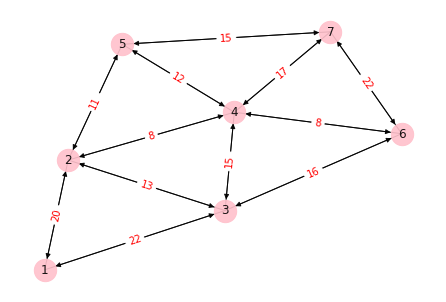

In [11]:
from networkx.algorithms.flow import preflow_push
N = preflow_push(G,1,7)
pos = nx.spring_layout(N)
plt.figure()
nx.draw(N,pos,edge_color='black',width=1,linewidths=1,node_size=500,node_color='pink',alpha=0.9,labels={node:node for node in G.nodes()})
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,font_color='red')
for u in R:
    for e in R[u].values():
        if(e['flow']>=0):
            print(e)
print (flow_value)